<a href="https://colab.research.google.com/github/malavikasreekumar/Boston-House-price-prediction/blob/master/Boston_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

1.15.0


In [2]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std  

57344/57026 [==============================] - 0s 0us/step


In [0]:
def build_model():
    model = keras.Sequential([
        Dense(20, activation=tf.nn.relu, input_shape=[len(train_features[0])]),
        Dense(1)
    ])

    model.compile(optimizer=tf.train.AdamOptimizer(), 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model

In [4]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.......................
Final Root Mean Square Error on validation set: 2.327


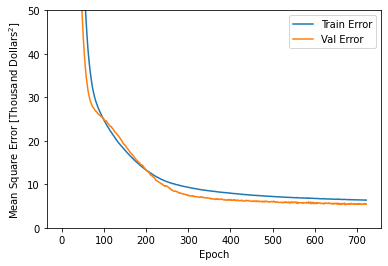

In [5]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,50])

plot_history()

In [8]:
!pwd

/content


Reinitialized existing Git repository in /content/.git/

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@b2c1a64c8911.(none)')
fatal: remote origin already exists.
error: src refspec master does not match any.
error: failed to push some refs to 'https://github.com/malavikasreekumar/Boston-House-price-prediction.git'


In [6]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

102/102 [==============================] - 0s 114us/sample - loss: 19.4774 - mean_absolute_error: 2.6757 - mean_squared_error: 19.4774
Root Mean Square Error on test set: 4.413


In [5]:
!git init
!git add
!git config --global user.email "codermalavika@gmail.com"
!git config --global user.name "malavikasreekumar"
!git commit -m "first commit"
!git remote add origin https://github.com/malavikasreekumar/Boston-House-price-prediction.git
!git push 
                

Reinitialized existing Git repository in /content/.git/
Nothing specified, nothing added.
Maybe you wanted to say 'git add .'?
On branch master

Initial commit

Untracked files:
	.config/
	sample_data/

nothing added to commit but untracked files present
fatal: remote origin already exists.
fatal: The current branch master has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin master



In [0]:
  !git config --global user.email "codermalavika@gmail.com"
  !git config --global user.name "malavikasreekumar"
